# DATA EXPLORATION
- Goal: Address each of the questions you posed in your planning and brainstorming and any others you have come up with along the way through **visual or statistical analysis**.

- When you have completed this step, you will have the findings from your analysis that will be used in your final report, answers to specific questions your customers has asked, and information to move forward toward building a model.

- Run at least **1 t-test** and **1 correlation test** (but as many as you need!)

- **Visualize** all combinations of variables in some way(s).

- What **independent variables** are **correlated** with the **dependent**? (this is good)

- Which **independent variables** are **correlated** with other **independent** variables? (this is not so good and needs to be addressed)

- **Summarize** your takeaways and conclusions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from split_scale import split_data


In [2]:
train, test= split_data()
train.head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,fips,home_value,bedrm_per_bathrm
14140,1474.0,3.0,1.0,0.011239,1947.0,6037.0,376762.0,3.0
12285,1038.0,2.0,1.0,0.013987,1947.0,6037.0,273788.0,2.0
13357,1430.0,3.0,2.0,0.012328,1948.0,6037.0,293323.0,1.5
14130,1221.0,3.0,2.0,0.011433,1950.0,6037.0,209995.0,1.5
1187,1995.0,3.0,3.0,0.016237,1990.0,6037.0,227220.0,1.0


In [3]:
train.describe()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,fips,home_value,bedrm_per_bathrm
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,1583.968169,3.099535,1.960691,0.013141,1955.384802,6043.283145,319912.060732,1.714774
std,537.110853,0.804922,0.673411,0.001675,20.149965,16.141149,191799.183389,0.576147
min,320.000000,0.000000,1.000000,0.010687,1880.000000,6037.000000,12788.000000,0.000000
25%,1196.000000,3.000000,1.500000,0.012110,1947.000000,6037.000000,173450.750000,1.333333
50%,1494.000000,3.000000,2.000000,0.012590,1954.000000,6037.000000,285138.500000,1.500000
75%,1890.000000,4.000000,2.000000,0.013739,1965.000000,6037.000000,436896.250000,2.000000
max,3511.000000,5.000000,3.000000,0.018991,2015.000000,6111.000000,877000.000000,5.000000


In [4]:
train.fips.value_counts()

6037.0    8053
6059.0    1427
6111.0     416
Name: fips, dtype: int64

In [5]:
train[train.fips == 6037].head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,fips,home_value,bedrm_per_bathrm
14140,1474.0,3.0,1.0,0.011239,1947.0,6037.0,376762.0,3.0
12285,1038.0,2.0,1.0,0.013987,1947.0,6037.0,273788.0,2.0
13357,1430.0,3.0,2.0,0.012328,1948.0,6037.0,293323.0,1.5
14130,1221.0,3.0,2.0,0.011433,1950.0,6037.0,209995.0,1.5
1187,1995.0,3.0,3.0,0.016237,1990.0,6037.0,227220.0,1.0


## Tax rate distribution

Text(0.5, 0, 'tax_rate')

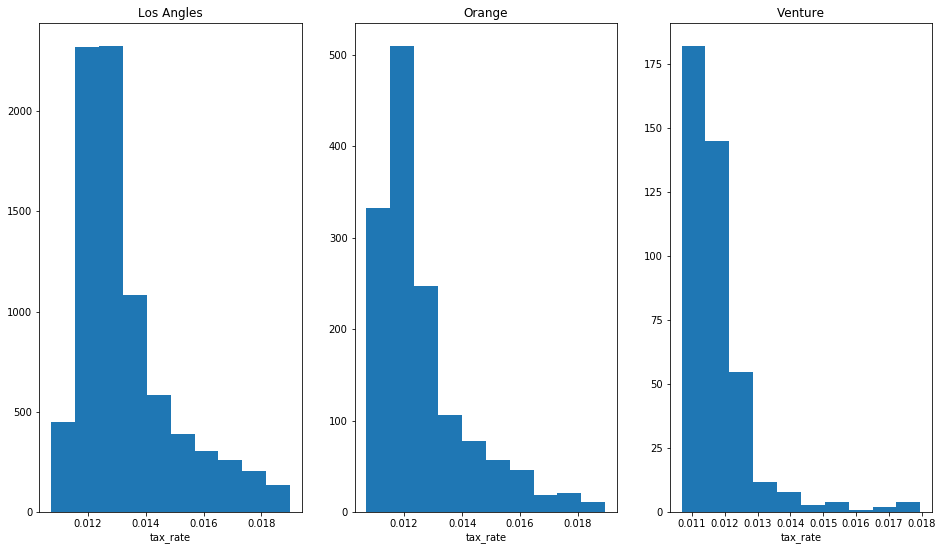

In [6]:
plt.figure(figsize = (16,9))

plt.subplot(131)
plt.hist(train[train.fips == 6037].tax_rate)
plt.title('Los Angles')
plt.xlabel('tax_rate')

# the second subplot
plt.subplot(132)
plt.hist(train[train.fips == 6059].tax_rate)
plt.title('Orange')
plt.xlabel('tax_rate')

plt.subplot(133)
plt.hist(train[train.fips == 6111].tax_rate)
plt.title('Venture')
plt.xlabel('tax_rate')

In [7]:
train.groupby('fips').tax_rate.describe()

,count,mean,std,min,25%,50%,75%,max
fips,,,,,,,,
6037.0,8053.0,0.013309,0.001665,0.010734,0.012231,0.012716,0.013917,0.018991
6059.0,1427.0,0.012595,0.001567,0.010702,0.011556,0.012093,0.013082,0.018939
6111.0,416.0,0.011757,0.001088,0.010687,0.011084,0.011554,0.012050,0.017957


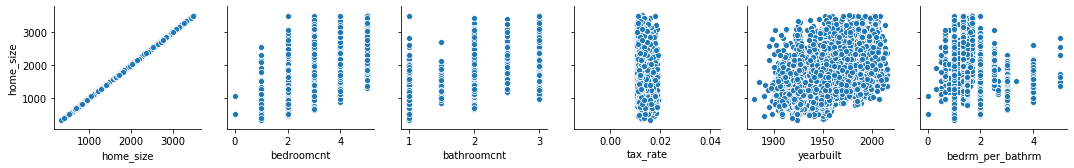

In [8]:
X = ['home_size', 'bedroomcnt', 'bathroomcnt', 'tax_rate', 'yearbuilt', 'bedrm_per_bathrm']
sns.pairplot(train, x_vars = X , y_vars='home_size')

In [9]:
train.tax_rate.value_counts

<bound method IndexOpsMixin.value_counts of 14140    0.011239
12285    0.013987
13357    0.012328
14130    0.011433
1187     0.016237
           ...   
6387     0.013676
15949    0.018046
1570     0.016127
15201    0.012141
4493     0.012445
Name: tax_rate, Length: 9896, dtype: float64>

In [10]:
train.tax_rate.min()

0.01068739331288124

In [11]:
train.corr()[['home_value']].abs().sort_values(by = 'home_value')

,home_value
fips,0.065989
bedroomcnt,0.167004
bedrm_per_bathrm,0.176188
yearbuilt,0.178690
bathroomcnt,0.286013
home_size,0.367911
tax_rate,0.538066
home_value,1.000000


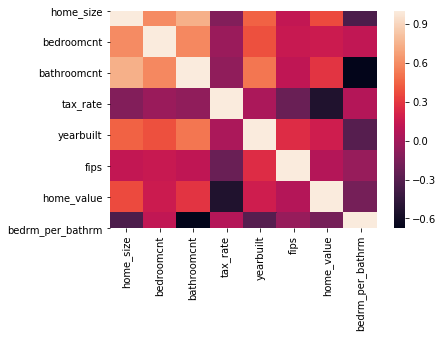

In [12]:
sns.heatmap(train.corr())

## t_test

#### Question: Are the home_values of the 3 bedrooms  higher than the ones with only 2 bedrooms
- $H_0$: There is no difference between those two 
- $H_0$: There is a differnce 

Hypothesis test: Two_sample_t_test  
$a$ = 0.05

In [13]:
from scipy import stats

In [14]:
x1 = train[train.bedroomcnt == 3].home_value
x2 = train[train.bedroomcnt == 2].home_value

In [15]:
t, p = stats.ttest_ind(x1, x2)
p 

8.010046744917538e-10

Because p is less than a, we can conclude that there is a difference between home with 3 bedrooms and home with 2 bedrooms

## Correlation Test

1: Question:Does **tax rate** and **home_value** have a linear correlation  
- $H_0$: They don't   
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [16]:
x = train.tax_rate
y = train.home_value

In [17]:
corr, p = stats.pearsonr(x, y)
corr, p

(-0.5380662326247586, 0.0)

2: Question:Does **home_size** and **home_value** have a linear correlation
- $H_0$: They don't 
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [18]:
x = train.home_size
y = train.home_value

In [19]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.36791074901390625, 7.35766531e-315)

3: Question:Does **bedrm_per_bathrm** and **home_value** have a linear correlation
- $H_0$ : They don't 
- $H_0$ : They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [20]:
x = train.bedrm_per_bathrm
y = train.home_value
corr, p = stats.pearsonr(x, y)
corr, p

(-0.1761882586251586, 8.069329369324077e-70)

4: Question:Does **yearbuilt** and **home_value** have a linear correlation
    
    - $H_0$: They don't 
    - $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [21]:
x = train.yearbuilt
y = train.home_value
corr, p = stats.pearsonr(x, y)
corr, p

(0.17869042578464694, 8.530538180404727e-72)

5.: Question:Does **home_size** and **bathroomcnt** have a linear correlation
- $H_0$: They don't 
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [22]:
x = train.bathroomcnt
y = train.home_size
corr, p = stats.pearsonr(x, y)
corr, p

(0.7428771163759361, 0.0)

6.: Question:Does **bedroomcnt** and **bathroomcnt** have a linear correlation
- $H_0$: They don't 
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [23]:
x = train.bathroomcnt
y = train.bedroomcnt
corr, p = stats.pearsonr(x, y)
corr, p

(0.5845454753434592, 0.0)

## Summary

- Home_size, bedroomcnt and bathroomcnt are all strongly correlated, So when doing the feature selection, It is preferred to use rfe method.
- It is a kind of domin knowlege that the higher the propert tax, ther better the neigbourhood, so the price of a home is higher. And the relation test show the have absolute linear relaitonship.
- Even though it is pretty common to think the age of a house is positvely related to the home price, but some how the data did not give us very strong correlations.